Edge Weights:  {(0, 1): 3, (0, 2): 2, (0, 3): 4, (0, 4): 3, (0, 5): 2, (0, 6): 1, (1, 2): 5, (1, 3): 1, (1, 4): 9, (1, 5): 4, (1, 6): 8, (2, 3): 7, (2, 4): 2, (2, 5): 9, (2, 6): 9, (3, 4): 1, (3, 5): 3, (3, 6): 2, (4, 5): 9, (4, 6): 6, (5, 6): 1}


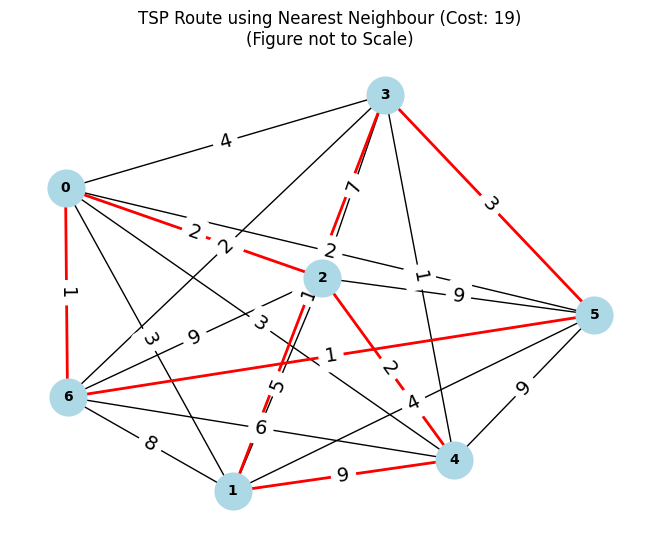

NN Path:  [2, 0, 6, 5, 3, 1, 4, 2]
NN Route Cost:  19


Optimal Path: (0, 2, 4, 3, 1, 5, 6)
Optimal Route Cost: 12


In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

def nearest_neighbour_tsp(graph, start_node):
    n = len(graph.nodes)
    visited = [start_node]
    current_node = start_node

    while len(visited) < n:
        neighbors = list(graph.neighbors(current_node))
        # Filter out visited neighbors
        unvisited_neighbors = [node for node in neighbors if node not in visited]
        # Find the nearest unvisited neighbor
        next_node = min(unvisited_neighbors, key=lambda node: graph[current_node][node]['weight'])
        visited.append(next_node)
        current_node = next_node

    # Return to the starting node
    visited.append(start_node)
    return visited

# Create a graph with n nodes and random edge weights
n = 7
graph = nx.complete_graph(n)

# Assign random weights to the edges
for (u, v) in graph.edges():
    graph.edges[u, v]['weight'] = np.random.randint(1, 10)

print("Edge Weights: ", nx.get_edge_attributes(graph, 'weight'))

# Choose a random start node
start_node = np.random.choice(graph.nodes)

# Get the TSP route using Nearest Neighbour algorithm
tsp_route = nearest_neighbour_tsp(graph, start_node)

# Calculate the total weight (cost) of the TSP route
route_cost = sum(graph[tsp_route[i]][tsp_route[i+1]]['weight'] for i in range(len(tsp_route) - 1))

# Visualize the TSP route
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
# Extract edge weights
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edges(graph, pos, edgelist=[(tsp_route[i], tsp_route[i+1]) for i in range(len(tsp_route)-1)], edge_color='r', width=2)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=14)

plt.title(f"TSP Route using Nearest Neighbour (Cost: {route_cost})\n(Figure not to Scale)")
plt.show()

# Print the TSP route and cost
print("NN Path: ", tsp_route)
print("NN Route Cost: ", route_cost)

print("\n")

#Brute Force
def calculate_path_length(graph, path):
    """Calculate the total length of the given path."""
    length = 0
    for i in range(len(path) - 1):
        length += graph[path[i]][path[i + 1]]['weight']
    # Add the distance from the last node back to the first node to complete the cycle
    length += graph[path[-1]][path[0]]['weight']
    return length

def brute_force_tsp(graph):
    """Solve the TSP problem using brute force."""
    nodes = list(graph.nodes)
    min_path = None
    min_length = float('inf')

    # Generate all permutations of the nodes
    for permutation in itertools.permutations(nodes):
        current_length = calculate_path_length(graph, permutation)
        if current_length < min_length:
            min_length = current_length
            min_path = permutation

    return min_path, min_length

optimal_path, optimal_length = brute_force_tsp(graph)
print("Optimal Path:", optimal_path)
print("Optimal Route Cost:", optimal_length)
